In [1]:
#데이터 전처리
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import os
import matplotlib.pyplot as plt
import numpy as np
import sys
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
#MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]) )
print("테스트셋 이미지수 : %d 개"% (X_test.shape[0]) )


학습셋 이미지 수 : 60000 개
테스트셋 이미지수 : 10000 개


In [3]:
#차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float32' )/ 255


In [4]:
Y_train = tf.keras.utils.to_categorical(Y_class_train,10)
Y_test = tf.keras.utils.to_categorical(Y_class_test,10)

In [5]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
MODEL_DIR ='./model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=30,
batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy : %.4f" % (model.evaluate(X_test,Y_test) [1] ))


Epoch 00001: val_loss improved from inf to 0.15295, saving model to ./model\01-0.1529.hdf5

Epoch 00002: val_loss improved from 0.15295 to 0.10529, saving model to ./model\02-0.1053.hdf5

Epoch 00003: val_loss improved from 0.10529 to 0.08126, saving model to ./model\03-0.0813.hdf5

Epoch 00004: val_loss improved from 0.08126 to 0.07529, saving model to ./model\04-0.0753.hdf5

Epoch 00005: val_loss improved from 0.07529 to 0.06790, saving model to ./model\05-0.0679.hdf5

Epoch 00006: val_loss improved from 0.06790 to 0.06750, saving model to ./model\06-0.0675.hdf5

Epoch 00007: val_loss improved from 0.06750 to 0.06143, saving model to ./model\07-0.0614.hdf5

Epoch 00008: val_loss did not improve from 0.06143

Epoch 00009: val_loss improved from 0.06143 to 0.06033, saving model to ./model\09-0.0603.hdf5

Epoch 00010: val_loss did not improve from 0.06033

Epoch 00011: val_loss did not improve from 0.06033

Epoch 00012: val_loss did not improve from 0.06033

Epoch 00013: val_loss did n

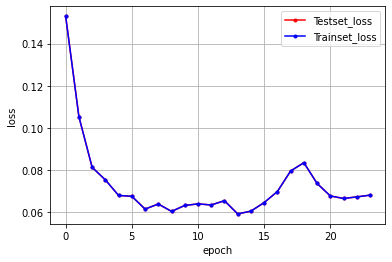

In [8]:
y_vloss = history.history['val_loss']

y_loss  = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_vloss, marker='.', c="blue", label="Trainset_loss")

plt.legend(loc='upper right')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
model.save('./model/my_model_cnn.h5')#최종학습결과를 모델